#NFW DENSITY PROFILE

In [ ]:
##Marta Perosa

In [ ]:
###prima parte

a) Implementare la funzione per calcolare Σ(𝑅, 𝑀, 𝑐, 𝑧) e mostrare in un grafico
composto da 9 pannelli i profili di densità nell'intervallo R tra 0.03 e 10 Mpc, per le
seguenti combinazioni di valori di massa e concentrazione: Massa solare = [10^13.5, 10^14.0, 10^15.0], c = [2, 5, 10] e z = 0.0.(usare scala logaritmica per migliorare la
visualizzazione)

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import scipy.stats as stats
import matplotlib.axes as axes

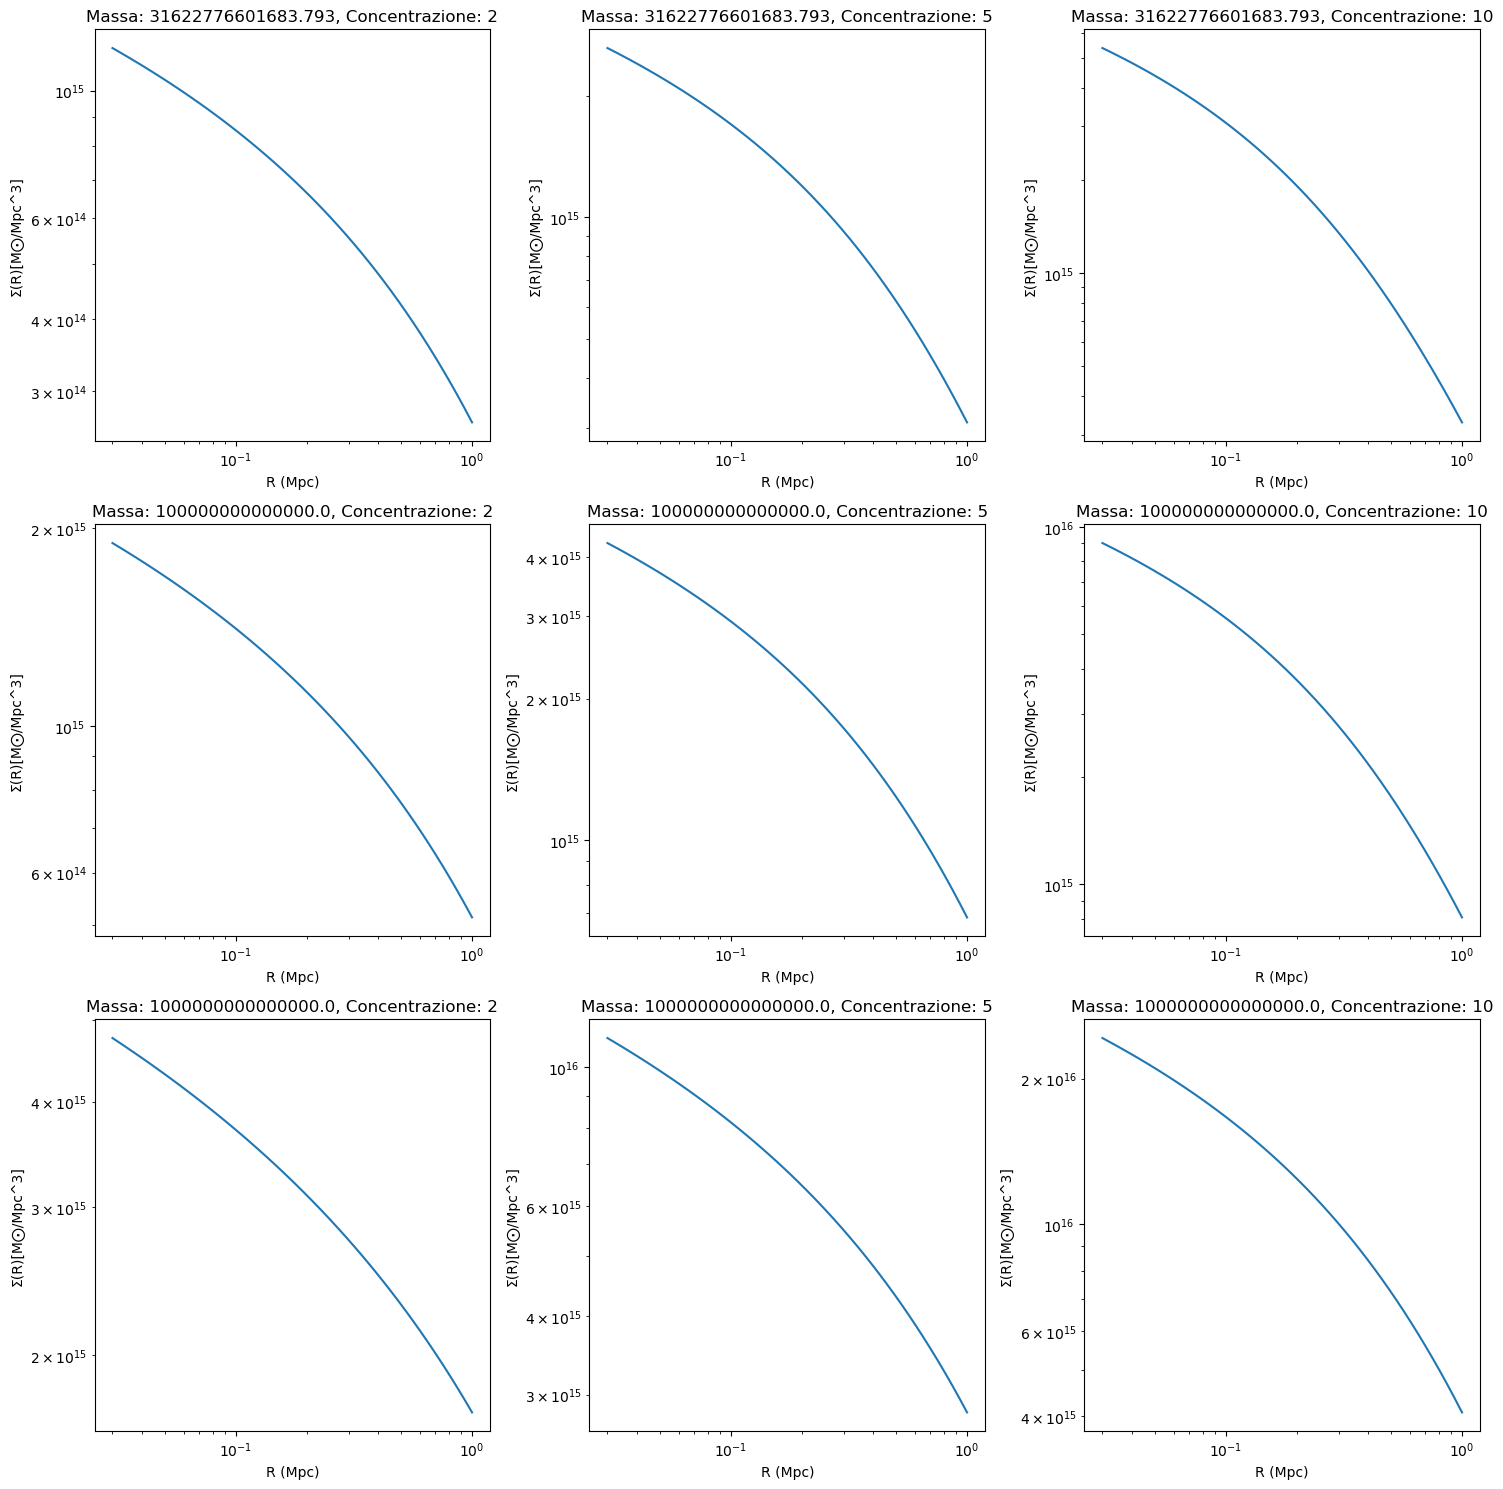

In [4]:
# Definiamo la funzione: accetta i valori di raggio, massa, concentrazione e redshift
# Calcola il profilo di densità degli aloni
def calculate_density_profile(R, M, c, z):
    # Definisco i valori che mi serviranno poi per la funzione sigma
    
    ro_m = 0.286 * (2.7751428946 * 10**11) * 0.7**2
    f_c = math.log(1 + c) - (c / (1 + c))
    delta_c= 200 * c**3 / (3 * f_c)
    ro_s = ro_m * delta_c * (1 + z)**3
    r_s = ((3 * M / (4 * np.pi * ro_m* ((1 + z)**3))) ** (1 / 3)) /c
    
    # Calcolo della funzione f(x) 
    x = R / r_s
    f_x = np.zeros_like(x)
    
    # faccio un ciclo for che itera su una sequenza di numeri interi, 
    #partendo da 0 fino a un numero pari alla lunghezza della lista x. In questo caso, x è 
    #un array numpy, e len(x) restituisce la lunghezza di tale array.
    
    for i in range (len(x)):
      if(x[i]<=1):
        f_x[i]=(1-(2*np.arctanh(math.sqrt((1-x[i])/(1+x[i]))))/(math.sqrt(1-x[i]**2)))/(x**2-1)[i]
      elif(x[i]==1):
        f_x[i]=1/3
      else:
        f_x[i]=(1-(2*np.arctan(math.sqrt((x[i]-1)/(1+x[i]))))/(math.sqrt(x[i]**2-1)))/(x**2-1)[i]

    # infine mettendo tutte le variabili assieme e ottengo la fuznione sigma 
    Sigma = 2 * f_x * r_s * ro_s

    return Sigma


#ora voglio mettere i valori di M c e z dati nell esercizio 
masse = [10**13.5, 10**14.0, 10**15.0]
concentraz = [2, 5, 10]
z = 0.0  # Redshift fissato a zero

# La funzione np.logspace in NumPy è utilizzata per creare un 
#array di valori equidistanti su una scala logaritmica
#qua metto da 0.03 a 1 come indicato dall esercizio 
R_val = np.logspace(np.log10(0.03), np.log10(1.0), base = 10)
#print(R_val) #per vedere che valori di R sta prendendo

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, M in enumerate(masse):
    for j, c in enumerate(concentraz):
        sigma = calculate_density_profile(R_val, M, c, z)
        axs[i, j].plot(R_val, sigma)
        axs[i, j].set_xscale('log')
        axs[i, j].set_yscale('log')
        axs[i, j].set_xlabel('R (Mpc)')
        axs[i, j].set_ylabel('Σ(R)[M⨀/Mpc^3]')
        axs[i, j].set_title(f'Massa: {M}, Concentrazione: {c}')

plt.tight_layout()
plt.show()


###commento: 

In [ ]:
Ogni grafico rappresenta un set di massa e conecntrazione per un totale di 9 grafici.
I grafici risultano simili in ognuno dei 9 grafici stampati anche se è importante notare che
i valori sull'asse dell y variano da un grafico all'altro.
La curva inoltre appare fortmente descrescente rentituendo quindi la indormazione che
la densità media diminuisce gradualmente all'aumentare del raggio.
